# Import Library

In [48]:
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
from PIL import Image
import io

In [49]:
print(f'pandas ver. = {pd.__version__}')
print(f'bs4 ver. = {bs4.__version__}')

pandas ver. = 2.1.4
bs4 ver. = 4.12.2


In [50]:
pd.Timestamp.today()

Timestamp('2024-05-17 13:11:55.739057')

# Scraping Data

In [51]:
url = "https://thailand.liverpoolfc.com/team"
r = requests.get(url)
# return html code
r.text[:100]

'<!DOCTYPE html>\n<!--[if lt IE 7 ]> <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://openg'

In [52]:
s = BeautifulSoup(r.text,'lxml')
type(s)

bs4.BeautifulSoup

In [53]:
# จัดรูป html ให้สวยงามและแสดงค่าออกมา
print(s.prettify())

<!DOCTYPE html>
<!--[if lt IE 7 ]> <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie6 oldie"> <![endif]-->
<!--[if IE 7 ]>    <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie7 oldie"> <![endif]-->
<!--[if IE 8 ]>    <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie8 oldie"> <![endif]-->
<!--[if IE 9 ]>    <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie9"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js" id="top">
 <!--<![endif]-->
 <head>
  <script>
   (function(H){H.className=H.className.replace(/\bno-js\b/,'js')})(document.documentElement);

    if (window.history.replaceState && windo

In [57]:
members = s.select('li.team-player-list-item')
print(members)

[<li class="team-player-list-item">
<div class="img-wrap">
<img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132584_misc_general_500.jpeg"/>
</div>
<div class="number">1</div>
<div class="about">
<div class="name">
<span>Alisson</span> <span>Becker</span>
</div>
</div>
</li>, <li class="team-player-list-item">
<div class="img-wrap">
<img alt="Adrian" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132595_misc_general_500.jpeg"/>
</div>
<div class="number">13</div>
<div class="about">
<div class="name">
<span>Adrian</span>
</div>
</div>
</li>, <li class="team-player-list-item">
<div class="img-wrap">
<img alt="Caoimhin Kelleher" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132725_misc_general_500.jpeg"/>
</div>
<div class="number">62</div>
<div class="about">
<div class="name">
<span>Caoimhin</span> <span>Kelleher</span>
</div>
</div>
</li>, <li class="team-player-list

In [58]:
len(members)

32

In [59]:
members[0]

<li class="team-player-list-item">
<div class="img-wrap">
<img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132584_misc_general_500.jpeg"/>
</div>
<div class="number">1</div>
<div class="about">
<div class="name">
<span>Alisson</span> <span>Becker</span>
</div>
</div>
</li>

In [62]:
print(members[0].prettify())

<li class="team-player-list-item">
 <div class="img-wrap">
  <img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132584_misc_general_500.jpeg"/>
 </div>
 <div class="number">
  1
 </div>
 <div class="about">
  <div class="name">
   <span>
    Alisson
   </span>
   <span>
    Becker
   </span>
  </div>
 </div>
</li>



In [110]:
m = members[0].select_one('div.name').select('span')[0].text
#or 
m = members[1].select_one("div.name")
if len(m.select('span')) > 1:mem_name = m.select("span")[0].text + " " + m.select("span")[1].text
else : mem_name = m.select_one("span").text
mem_name

'Adrian'

In [106]:
m.select('span')

[<span>Joe</span>, <span>Gomez</span>]

In [93]:
m

[<div class="name">
 <span>Alisson</span> <span>Becker</span>
 </div>]

In [72]:
print(members[0].select_one("div.number"))
print(members[0].select_one("div.number").text)

<div class="number">1</div>
1


In [76]:
members[0].select_one('img')['src']

'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132584_misc_general_500.jpeg'

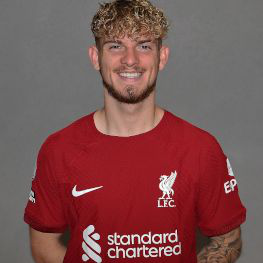

In [80]:
r1 = requests.get(members[20].select_one('img')['src'])
img = Image.open(io.BytesIO(r1.content))
img

In [ ]:
def save_img(imgfile : str, contents):
    with open(imgfile, 'wb') as f:
        f.write(contents)

In [117]:
lst = []
for e in members[:]:
    mem_img_url = e.select_one('img')['src']
    mem_num = e.select_one("div.number").text
    m = e.select_one("div.name")
    if len(m.select('span')) > 1:mem_name = m.select("span")[0].text + " " + m.select("span")[1].text
    else : mem_name = m.select_one("span").text
    print(f"{mem_name} {mem_num} {mem_img_url}")
    lst.append([mem_name,mem_num,mem_img_url])

Alisson Becker 1 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132584_misc_general_500.jpeg
Adrian 13 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132595_misc_general_500.jpeg
Caoimhin Kelleher 62 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132725_misc_general_500.jpeg
Joe Gomez 2 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132854_misc_general_500.jpeg
Virgil van 4 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132600_misc_general_500.jpeg
Ibrahima Konate 5 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132853_misc_general_500.jpeg
Kostas Tsimikas 21 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132594_misc_general_500.jpeg
Calvin Ramsay 22 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132857_misc_general_500.jpeg
Andy Robertson 26 https://d3j2s6hdd6a7rg.cloudfro

# Create DataFrame

In [121]:
df = pd.DataFrame(lst,columns = ['name','number','img_url'])
df

,name,number,img_url
0,Alisson Becker,1,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...
1,Adrian,13,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...
2,Caoimhin Kelleher,62,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...
3,Joe Gomez,2,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...
4,Virgil van,4,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...
5,Ibrahima Konate,5,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...
6,Kostas Tsimikas,21,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...
7,Calvin Ramsay,22,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...
8,Andy Robertson,26,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...
9,Joel Matip,32,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...


In [122]:
from IPython.display import HTML

In [135]:
def html_to_img(url = None,width = 100):
    return f'<img src="{url}" width="{width}"/>'

In [136]:
html_to_img("https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132587_misc_general_500.jpeg")

'<img src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132587_misc_general_500.jpeg" width="100"/>'

In [138]:
df['img'] = df.apply(lambda r : html_to_img(r['img_url']),axis=1)
df

,name,number,img_url,img
0,Alisson Becker,1,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...,"<img src=""https://d3j2s6hdd6a7rg.cloudfront.ne..."
1,Adrian,13,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...,"<img src=""https://d3j2s6hdd6a7rg.cloudfront.ne..."
2,Caoimhin Kelleher,62,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...,"<img src=""https://d3j2s6hdd6a7rg.cloudfront.ne..."
3,Joe Gomez,2,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...,"<img src=""https://d3j2s6hdd6a7rg.cloudfront.ne..."
4,Virgil van,4,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...,"<img src=""https://d3j2s6hdd6a7rg.cloudfront.ne..."
5,Ibrahima Konate,5,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...,"<img src=""https://d3j2s6hdd6a7rg.cloudfront.ne..."
6,Kostas Tsimikas,21,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...,"<img src=""https://d3j2s6hdd6a7rg.cloudfront.ne..."
7,Calvin Ramsay,22,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...,"<img src=""https://d3j2s6hdd6a7rg.cloudfront.ne..."
8,Andy Robertson,26,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...,"<img src=""https://d3j2s6hdd6a7rg.cloudfront.ne..."
9,Joel Matip,32,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...,"<img src=""https://d3j2s6hdd6a7rg.cloudfront.ne..."


In [150]:
HTML(df[:][['name', 'number', 'img']].to_html(escape=False))

,name,number,img
0,Alisson Becker,1,
1,Adrian,13,
2,Caoimhin Kelleher,62,
3,Joe Gomez,2,
4,Virgil van,4,
5,Ibrahima Konate,5,
6,Kostas Tsimikas,21,
7,Calvin Ramsay,22,
8,Andy Robertson,26,
9,Joel Matip,32,
